In [1]:
# This program trains three feedforward DNNs on the MNIST dataset
# Graphs are produces showing loss and accuracy of all model for training and test sets

import numpy as np
import torch
import torchvision as tv
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

C:\Users\anoop\anaconda3\envs\pytorch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] The specified module could not be found
  warn(f"Failed to load image Python extension: {e}")


In [2]:
# Grab MNIST dataset
trainingSet = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))
testingSet = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))
train = torch.utils.data.DataLoader(trainingSet, batch_size=50, shuffle=True)
test = torch.utils.data.DataLoader(testingSet, batch_size=50, shuffle=True)

In [3]:
# Set up NN for MNIST training
# Shallow NN for training - 1 Hidden layer / 23860 Parameters
class ShallowTrainNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 30)
        self.fc2 = nn.Linear(30, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = self.fc2(val)
        return val
    
# Middle NN for training - 3 Hidden layer / 23893 Parameters
class MiddleTrainNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 25)
        self.fc2 = nn.Linear(25, 60)
        self.fc3 = nn.Linear(60, 38)
        self.fc4 = nn.Linear(38, 10)

    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = self.fc4(val)
        return val
    
    
# Deep NN for simulation -  5 Hidden Layers / 23890 Parameters
class DeepTrainNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 40)
        self.fc3 = nn.Linear(40, 60)
        self.fc4 = nn.Linear(60, 50)        
        self.fc5 = nn.Linear(50, 30)
        self.fc6 = nn.Linear(30, 10)        
        
    def forward(self, val):
        val = F.relu(self.fc1(val))
        val = F.relu(self.fc2(val))
        val = F.relu(self.fc3(val))
        val = F.relu(self.fc4(val))
        val = F.relu(self.fc5(val))
        val = self.fc6(val)
        return val

In [4]:
# Set up necessary auxilaries for neural net training
shallownn = ShallowTrainNN()
middlenn = MiddleTrainNN()
deepnn = DeepTrainNN()
costFunc = nn.CrossEntropyLoss()
shallowOpt = optim.Adam(shallownn.parameters(), lr=0.001)
middleOpt = optim.Adam(middlenn.parameters(), lr=0.001)
deepOpt = optim.Adam(deepnn.parameters(), lr=0.001)

In [5]:
# Train shalllow neural networks, Calculate accuracy for training and testing in each epoch
EPOCHS = 200
counter = 0
counterList = []
shallowCostList = []
shallowTestAccuracyList = []
shallowTrainAccuracyList = []
for index in range(EPOCHS):
    counterList.append(counter)
    counter += 1
    # Train model and keep track of loss
    for batch in train:
        inputImages, groundTruth = batch
        shallownn.zero_grad()
        output = shallownn(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        shallowOpt.step()
    shallowCostList.append(cost.detach().numpy())
    
    # Calculate accuracy of shallow model on training data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            output = shallownn(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    shallowTrainAccuracyList.append(round(correct/total, 3))

    # Calculate accuracy of shallow model on test data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            output = shallownn(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    shallowTestAccuracyList.append(round(correct/total, 3))
    

In [6]:
# Train middle neural networks, Calculate accuracy for training and testing in each epoch
middleCostList = []
middleTrainAccuracyList = []
middleTestAccuracyList = []
for index in range(EPOCHS):
    # Train model and keep track of loss
    for batch in train:
        inputImages, groundTruth = batch
        middlenn.zero_grad()
        output = middlenn(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        middleOpt.step()
    middleCostList.append(cost.detach().numpy())
    
    # Calculate accuracy of middle nn on training data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            output = middlenn(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    middleTrainAccuracyList.append(round(correct/total, 3))

    # Calculate accuracy of middle nn on test data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            output = middlenn(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    middleTestAccuracyList.append(round(correct/total, 3)) 

In [7]:
# Train Deep neural networks, Calculate accuracy for training and testing in each epoch
deepCostList = []
deepTrainAccuracyList = []
deepTestAccuracyList = []
for index in range(EPOCHS):
    # Train model and keep track of loss
    for batch in train:
        inputImages, groundTruth = batch
        deepnn.zero_grad()
        output = deepnn(inputImages.view(-1,784))
        cost = costFunc(output, groundTruth)
        cost.backward()
        deepOpt.step()
    deepCostList.append(cost.detach().numpy())
    
    # Calculate accuracy of deep nn on training data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in train:
            inputImages, groundTruth = batch
            output = deepnn(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    deepTrainAccuracyList.append(round(correct/total, 3))

    # Calculate accuracy of deep nn on test data
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in test:
            inputImages, groundTruth = batch
            output = deepnn(inputImages.view(-1,784))
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == groundTruth[i]:
                    correct += 1
                total += 1
    deepTestAccuracyList.append(round(correct/total, 3)) 

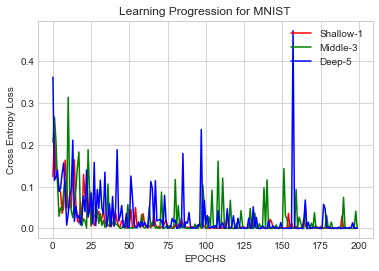

In [8]:
# Visulaize Training process of nn for MNIST dataset
plt.plot(counterList, shallowCostList, 'r', label='Shallow-1')
plt.plot(counterList, middleCostList, 'g', label='Middle-3')
plt.plot(counterList, deepCostList, 'b', label='Deep-5')
plt.title("Learning Progression for MNIST")
plt.xlabel("EPOCHS")
plt.ylabel("Cross Entropy Loss")
plt.legend(loc="upper right")
plt.show()

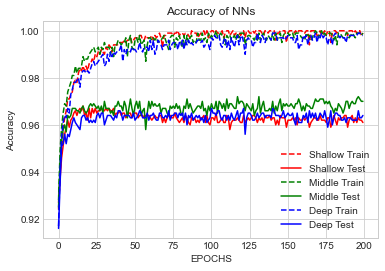

In [9]:
# Visulaize Accuracy of nn for for MNIST dataset
plt.plot(counterList, shallowTrainAccuracyList, 'r--', label='Shallow Train')
plt.plot(counterList, shallowTestAccuracyList, 'r', label='Shallow Test')
plt.plot(counterList, middleTrainAccuracyList, 'g--', label='Middle Train')
plt.plot(counterList, middleTestAccuracyList, 'g', label='Middle Test')
plt.plot(counterList, deepTrainAccuracyList, 'b--', label='Deep Train')
plt.plot(counterList, deepTestAccuracyList, 'b', label='Deep Test')
plt.title("Accuracy of NNs")
plt.xlabel("EPOCHS")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
plt.show()